In [229]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [230]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
Iris=pd.read_csv('iris.csv')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [231]:
Iris.shape

(150, 5)

In [232]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris=Iris.iloc[1:100,:]
Iris.shape

(99, 5)

In [233]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris.replace({"setosa":0,"versicolor":1},inplace=True)

In [234]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


Text(0, 0.5, 'SepalWidth')

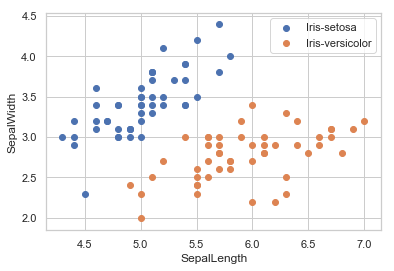

In [235]:
#visualization of given dataset
#codesegment4------------------
setosa=Iris[Iris["species"]==0]
versicolor=Iris[Iris["species"]==1]
plt.scatter(setosa["sepal_length"],setosa["sepal_width"],label='Iris-setosa')
plt.scatter(versicolor["sepal_length"],versicolor["sepal_width"],label='Iris-versicolor')
plt.legend(loc='best')
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")

In [236]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output


In [237]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
tf.set_random_seed(seed)

#line6-------------
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index=np.random.choice(len(X),size=80)
test_index = np.array(list(set(range(len(X))) - set(train_index)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [238]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [239]:
# Define the min-max normalization function

    # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [240]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W=tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [241]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [242]:
# Declare the 'model' you need to learn
#line11------------------------------------------
mod=tf.matmul(data,W)+b

In [243]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [244]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
learning_rate=0.003
batch_size=30
iter_num=1500
#batch_size---- #using batch makes the training ------?
#line13--------------------------------
#iter_num

In [245]:
# Define the optimizer with name opt
#line14-----------------------------
# Define the goal
opt=tf.train.GradientDescentOptimizer(learning_rate)
goal = opt.minimize(loss)

In [246]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [247]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc=[]

In [248]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_index=np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss= sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc=sess.run(accuracy,feed_dict={data:batch_train_X,target:batch_train_y})
    
    # recode the results of loss and train accuracy
    
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    

    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} '.format(epoch + 1, temp_loss,temp_train_acc))
                                                                          
#Write the command to calculate test accuracy:
#line18-------------------------------
temp_test_acc=sess.run(accuracy,feed_dict={data:test_X,target:np.matrix(test_y).T})
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 1.015132 train_acc: 0.500000 
epoch:  200 loss: 1.103154 train_acc: 0.400000 
epoch:  300 loss: 1.067479 train_acc: 0.366667 
epoch:  400 loss: 0.812414 train_acc: 0.466667 
epoch:  500 loss: 0.698412 train_acc: 0.500000 
epoch:  600 loss: 0.721350 train_acc: 0.433333 
epoch:  700 loss: 0.822281 train_acc: 0.300000 
epoch:  800 loss: 0.615408 train_acc: 0.433333 
epoch:  900 loss: 0.521689 train_acc: 0.500000 
epoch: 1000 loss: 0.584518 train_acc: 0.366667 
epoch: 1100 loss: 0.479916 train_acc: 0.466667 
epoch: 1200 loss: 0.460039 train_acc: 0.633333 
epoch: 1300 loss: 0.492235 train_acc: 0.733333 
epoch: 1400 loss: 0.406085 train_acc: 0.933333 
epoch: 1500 loss: 0.350227 train_acc: 1.000000 
The test accuracy is: 0.931818


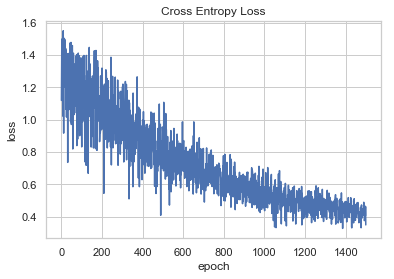

In [249]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(loss_trace)
plt.title("Cross Entropy Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

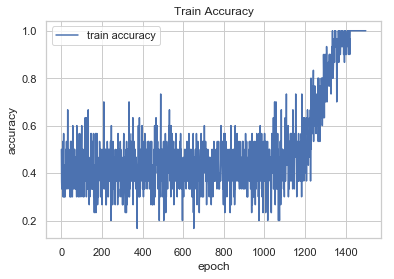

In [250]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(train_acc,label="train accuracy")
plt.title("Train Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()